<a href="https://colab.research.google.com/github/lauramsromano/DataScience_ML_PVendas/blob/main/DS_ML_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ad = pd.read_csv("advertising.csv")

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
ad.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


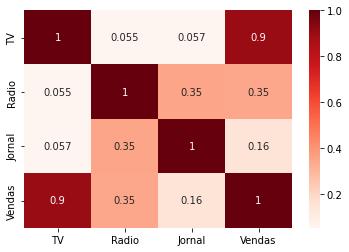

In [ ]:
sns.heatmap(ad.corr(), cmap="Reds",annot=True)
plt.show;

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [ ]:
y = ad['Vendas']
x = ad[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [ ]:
#importar: 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

#criar:
md_r_linear = LinearRegression()
md_arv_dec = RandomForestRegressor()

#treinar:
md_r_linear.fit(x_treino, y_treino)
md_arv_dec.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [ ]:
previsao_r_l = md_r_linear.predict(x_teste)
previsao_arv_d = md_arv_dec.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_r_l)) 
print(r2_score(y_teste, previsao_arv_d)) 

0.9071151423684273
0.9655512089301364


#### Visualização Gráfica das Previsões

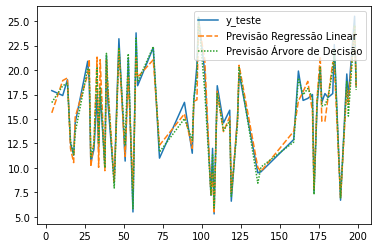

In [ ]:
ad_auxiliar = pd.DataFrame()
ad_auxiliar['y_teste'] = y_teste
ad_auxiliar['Previsão Regressão Linear'] = previsao_r_l
ad_auxiliar['Previsão Árvore de Decisão'] = previsao_arv_d

sns.lineplot(data=ad_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [ ]:
nv = pd.read_csv("novos.csv")
nv

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [ ]:
previsao_nv = md_arv_dec.predict(nv)
previsao_nv

array([ 7.559,  8.385, 19.805])